In [4]:
import sys, os
sys.path.append(os.path.dirname(os.getcwd())) # Include ../SSD in path
import tops
import matplotlib.pyplot as plt
import pathlib
from ssd.utils import load_config

In [69]:
cfg = load_config("../configs/task2_3_fpn.py")
logs_fpn = tops.logger.read_logs(pathlib.Path("../outputs/task2_3_fpn"))
cfg = load_config("../configs/task2_3_focal_loss.py")
logs_focal_loss = tops.logger.read_logs(pathlib.Path("../outputs/task2_3_focal_loss"))
cfg = load_config("../configs/task2_3_dpr_reg_hds.py")
logs_dpr_reg_hds = tops.logger.read_logs(pathlib.Path("../outputs/task2_3_dpr_reg_hds"))
cfg = load_config("../configs/task2_3_w_init.py")
logs_w_init = tops.logger.read_logs(pathlib.Path("../outputs/task2_3_w_init"))
cfg = load_config("../configs/task4_1_bifpn.py")
logs_bifpn = tops.logger.read_logs(pathlib.Path("../outputs/task4_1_bifpn"))

Saving SSD outputs to: outputs/
Saving SSD outputs to: outputs/
Saving SSD outputs to: outputs/
Saving SSD outputs to: outputs/
Saving SSD outputs to: outputs/


In [70]:
cfg = load_config("../configs/task2_3_fpn.py")
logs_fpn_A = tops.logger.read_logs(pathlib.Path("../outputs/task2_3_fpn_A"))
cfg = load_config("../configs/task2_3_focal_loss.py")
logs_focal_loss_A = tops.logger.read_logs(pathlib.Path("../outputs/task2_3_focal_loss_A"))
cfg = load_config("../configs/task2_3_dpr_reg_hds.py")
logs_dpr_reg_hds_A = tops.logger.read_logs(pathlib.Path("../outputs/task2_3_dpr_reg_hds_A"))
cfg = load_config("../configs/task2_3_w_init.py")
logs_w_init_A = tops.logger.read_logs(pathlib.Path("../outputs/task2_3_w_init_A"))

Saving SSD outputs to: outputs/
Saving SSD outputs to: outputs/
Saving SSD outputs to: outputs/
Saving SSD outputs to: outputs/


In [63]:
# The log is formatted as a list of dictionaries
print(logs_fpn[:10])

[{'amp/grad_scale': 32768.0, 'global_step': 0}, {'loss/regression_loss': 5.144312858581543, 'loss/classification_loss': 22.708166122436523, 'loss/total_loss': 27.85247802734375, 'global_step': 0}, {'amp/grad_scale': 16384.0, 'global_step': 1}, {'stats/learning_rate': 0.000509, 'global_step': 2}, {'stats/learning_rate': 0.000518, 'global_step': 3}, {'stats/learning_rate': 0.000527, 'global_step': 4}, {'stats/learning_rate': 0.000536, 'global_step': 5}, {'stats/learning_rate': 0.000545, 'global_step': 6}, {'stats/learning_rate': 0.000554, 'global_step': 7}, {'stats/learning_rate': 0.000563, 'global_step': 8}]


In [71]:
map_entries_fpn = [entry for entry in logs_fpn if "metrics/mAP" in entry]
map_entries_focal_loss = [entry for entry in logs_focal_loss if "metrics/mAP" in entry]
map_entries_dpr_reg_hds = [entry for entry in logs_dpr_reg_hds if "metrics/mAP" in entry]
map_entries_w_init = [entry for entry in logs_w_init if "metrics/mAP" in entry]
map_entries_bifpn = [entry for entry in logs_bifpn if "metrics/mAP" in entry]

In [72]:
map_entries_fpn_A = [entry for entry in logs_fpn_A if "metrics/mAP" in entry]
map_entries_focal_loss_A = [entry for entry in logs_focal_loss_A if "metrics/mAP" in entry]
map_entries_dpr_reg_hds_A = [entry for entry in logs_dpr_reg_hds_A if "metrics/mAP" in entry]
map_entries_w_init_A = [entry for entry in logs_w_init_A if "metrics/mAP" in entry]

Text(0.5, 0, 'Global step (number of batches trained on)')

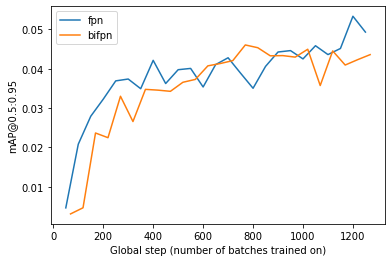

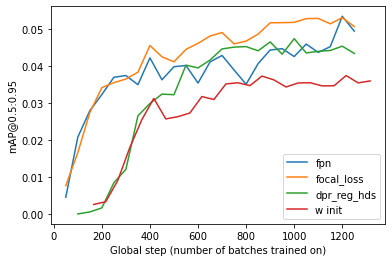

In [76]:
plt.figure(1)
plt.plot([entry["global_step"] for entry in map_entries_fpn], [entry["metrics/mAP"] for entry in map_entries_fpn])
plt.plot([entry["global_step"] for entry in map_entries_focal_loss], [entry["metrics/mAP"] for entry in map_entries_focal_loss])
plt.plot([entry["global_step"] for entry in map_entries_dpr_reg_hds], [entry["metrics/mAP"] for entry in map_entries_dpr_reg_hds])
plt.plot([entry["global_step"] for entry in map_entries_w_init], [entry["metrics/mAP"] for entry in map_entries_w_init])
plt.plot([entry["global_step"] for entry in map_entries_bifpn], [entry["metrics/mAP"] for entry in map_entries_bifpn])
plt.legend(["fpn", "focal_loss", "dpr_reg_hds", "w init", "bifpn"])
plt.ylabel("mAP@0.5:0.95")
plt.xlabel("Global step (number of batches trained on)")

plt.figure(2)
plt.plot([entry["global_step"] for entry in map_entries_fpn_A], [entry["metrics/mAP"] for entry in map_entries_fpn_A])
plt.plot([entry["global_step"] for entry in map_entries_focal_loss_A], [entry["metrics/mAP"] for entry in map_entries_focal_loss_A])
plt.plot([entry["global_step"] for entry in map_entries_dpr_reg_hds_A], [entry["metrics/mAP"] for entry in map_entries_dpr_reg_hds_A])
plt.plot([entry["global_step"] for entry in map_entries_w_init_A], [entry["metrics/mAP"] for entry in map_entries_w_init_A])
plt.legend(["fpn", "focal_loss", "dpr_reg_hds", "w init", "bifpn"])
plt.ylabel("mAP@0.5:0.95")
plt.xlabel("Global step (number of batches trained on)")

In [9]:
# We are saving logs to disk every 10th iteration, thus we need to filter out all entries without a loss
loss_entries = [entry for entry in logs_fpn if "loss/regression_loss" in entry]

Text(0.5, 0, 'Global step (number of batches trained on)')

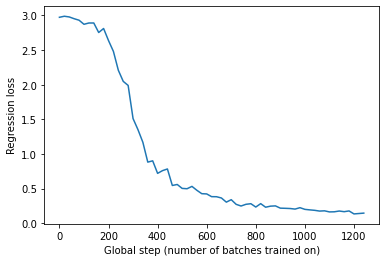

In [10]:
plt.plot([entry["global_step"] for entry in loss_entries], [entry["loss/regression_loss"] for entry in loss_entries])
plt.ylabel("Regression loss")
plt.xlabel("Global step (number of batches trained on)")